<h1><b style="font-family:Iceberg">EDA On Netflix Dataset</b></h1>




<p style="font-family:Iceberg">By :<br>
                            Sami Elhadraoui
                            <br>
                            Haimoudi Nouaman  
                            <br>
                            Habibi Abdellah
                            <br>
                            Abdulaal Najd  


</p>

<h3><i>Importing Libraries and Loading The Dataset</i></h3>

In [6]:
import numpy as np # linear algebra
import pandas as pd # for data preparation
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pylab as plt
import seaborn as sns


dff=pd.read_csv('netflix.csv')
dff.shape

FileNotFoundError: [Errno 2] No such file or directory: 'netflix.csv'

# Nouvelle section

<p> <h5>dff = pd.read_csv('netflix.csv') : </h5 >
This line uses the 'read_csv' function from Pandas to read the contents of the 'netflix.csv' file and create a DataFrame named 'dff'. The 'read_csv' function is designed to read data from a CSV file and convert it into a tabular structure.</p>

<h3><i>Top 5 Directors on Netflix</i></h3>

In [2]:
dff['director']=dff['director'].fillna('No Director Specified')
filtered_directors=pd.DataFrame()
filtered_directors=dff['director'].str.split(',',expand=True).stack()
filtered_directors=filtered_directors.to_frame()
filtered_directors.columns=['Director']
directors=filtered_directors.groupby(['Director']).size().reset_index(name='Total Content')
directors=directors[directors.Director !='No Director Specified']
directors=directors.sort_values(by=['Total Content'],ascending=False)
directorsTop5=directors.head(5)
directorsTop5=directorsTop5.sort_values(by=['Total Content'])
fig1=px.bar(directorsTop5,x='Total Content',y='Director',title='Top 5 Directors on Netflix')
fig1.show()

NameError: name 'dff' is not defined

**texte en gras**<h3><i>Top 10 Actors on Netflix</i></h3>


In [3]:
dff['cast']=dff['cast'].fillna('No Cast Specified')
filtered_cast=pd.DataFrame()
filtered_cast=dff['cast'].str.split(',',expand=True).stack()
filtered_cast=filtered_cast.to_frame()
filtered_cast.columns=['Actor']
actors=filtered_cast.groupby(['Actor']).size().reset_index(name='Total Content')
actors=actors[actors.Actor !='No Cast Specified']
actors=actors.sort_values(by=['Total Content'],ascending=False)
actorsTop5=actors.head(10)
actorsTop5=actorsTop5.sort_values(by=['Total Content'])
actorsTop5

NameError: name 'dff' is not defined

<h3><i>Top 5 Genres on Netflix</i></h3>

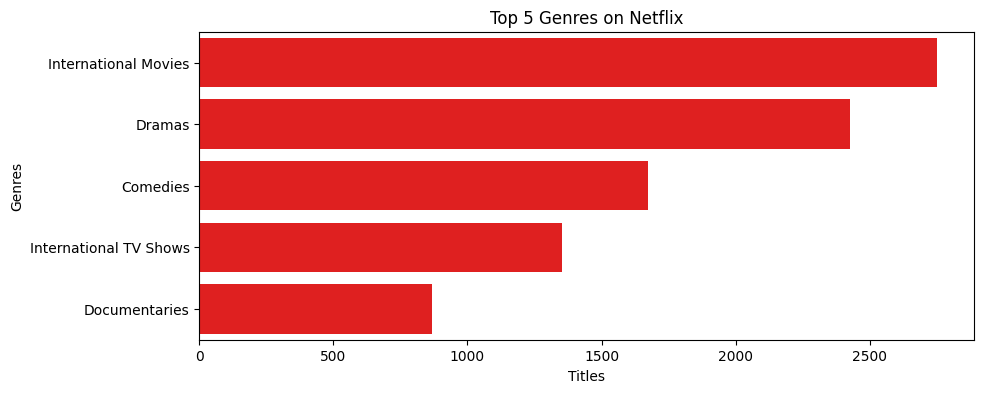

In [ ]:
filtered_genres = dff.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(10,4))
g = sns.countplot(color='red',y = filtered_genres, order=filtered_genres.value_counts().index[:5])
plt.title('Top 5 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

<h3><i>TV shows with the most seasons</i></h3>

In [ ]:
tv_series = dff[dff["type"] == "TV show"]
sorted_series = tv_series.sort_values(by="seasons", ascending=False)
top_5_series = sorted_series.head(5)
print("Les cinq meilleures séries télévisées avec le plus grand nombre de saisons :")
for index, row in top_5_series.iterrows():
    print(f"{row['title']} ({row['seasons']} saisons)")


,release_year,title
4250,1925,Pioneers: First Women Filmmakers*
7790,1942,Prelude to War
8205,1942,The Battle of Midway
8660,1943,Undercover: How to Operate Behind Enemy Lines
8739,1943,Why We Fight: The Battle of Russia


<h3><i>Top 5 Countries in terms of content</i></h3>

In [ ]:
country_count=dff['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:5]
topcountries

,count
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199


<h3><i>Difference bettwen Movies and Tv Shows in terms of content released on Netflix</i></h3>

Text(0.5, 1.0, 'Difference bettwen Movies and Tv Shows by content released on Netflix')

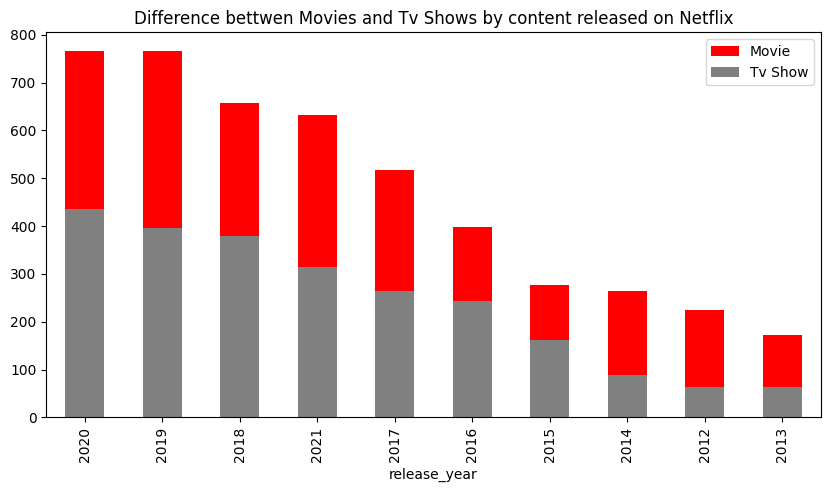

In [ ]:
plt.figure(figsize=(10,5))
dff[dff["type"]=="Movie"]["release_year"].value_counts()[:10].plot(kind="bar",color="Red")
dff[dff["type"]=="TV Show"]["release_year"].value_counts()[:10].plot(kind="bar",color="Grey")
L=plt.legend()
L.get_texts()[0].set_text("Movie")
L.get_texts()[1].set_text('Tv Show')
plt.title("Difference bettwen Movies and Tv Shows by content released on Netflix")



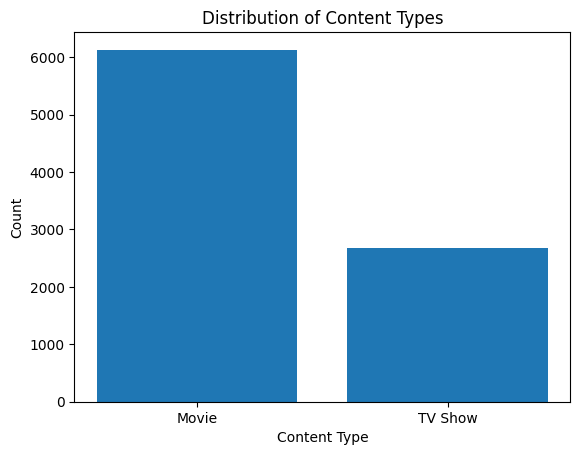

In [ ]:
content_types = dff['type'].value_counts()

plt.bar(content_types.index, content_types.values)
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.title('Distribution of Content Types')
plt.show()
